
========================🇧🇷=============================

 ## A empresa de biscoitos quer fazer um modelo para tentar prever como é a especificação de compra que a empresa adota a partir das notas recebidas nos itens X1 aX7

## Teste na base Biscobis os  algoritmos citados no enunciado.

## - GBM

##- n XGBoost

## -  LightGBM

## Qual deles apresentou melhor resultado? Quais variáveis mais importantes para cada modelo?



========================e 🇬🇧===============================


## The biscoitos company wants to make a model to try to predict how the purchase specification is that the company adopts from the notes received in the items X1 aX7

##Test in the Biscobis database the algorithms cited in the statement.


## - GBM

## -  XGBoost

## -  LightGBM


## Which are the most important variables for each model?

# ==========================================
# Gradient Boosting Classifier
# ==========================================

In [50]:
# ==========================================
# Gradient Boosting Classifier
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('/content/Biscobis.csv')
df.head()

,ident,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,0,32,4.2,1,0,1,1
1,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,0,58,6.8,1,0,1,3
2,7,4.6,2.4,9.5,6.6,3.5,4.5,7.6,0,46,5.8,1,0,1,1
3,9,5.5,1.6,9.4,4.7,3.5,3.0,7.6,0,63,5.4,1,0,1,3
4,11,2.4,1.6,8.8,4.8,2.0,2.8,5.8,0,32,4.3,1,0,0,1


In [52]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
target = df['x14']

X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)

# ==========================================
# Train and evaluate GBM
#Train a Gradient Boosting Classifier model, evaluate its performance, and identify the most important features.

# ==========================================







In [53]:
# 1. Instantiate the model
gbm_model = GradientBoostingClassifier(random_state=42)

# 2. Fit the model to the training data
gbm_model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_gbm = gbm_model.predict(X_test)

# 4. Evaluate the model's performance
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

print("Gradient Boosting Classifier Performance:")
print(f"Accuracy: {accuracy_gbm}")
print("Confusion Matrix:")
print(conf_matrix_gbm)
print("Classification Report:")
print(class_report_gbm)

# 5. Extract and print feature importances
feature_importances_gbm = gbm_model.feature_importances_
feature_names = X_train.columns
importance_df_gbm = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_gbm})
importance_df_gbm = importance_df_gbm.sort_values(by='importance', ascending=False)

print("\nFeature Importances (Gradient Boosting Classifier):")
print(importance_df_gbm)

Gradient Boosting Classifier Performance:
Accuracy: 0.8
Confusion Matrix:
[[6 1 1]
 [1 4 1]
 [0 0 6]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.80      0.67      0.73         6
           3       0.75      1.00      0.86         6

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.79        20
weighted avg       0.81      0.80      0.80        20


Feature Importances (Gradient Boosting Classifier):
  feature  importance
2      x3    0.302237
4      x5    0.222553
1      x2    0.146965
6      x7    0.135175
0      x1    0.125548
5      x6    0.035881
3      x4    0.031641



# ==========================================
# XG BOOST ALGORITHM
## Train an XGBoost Classifier model, evaluate its performance, and identify the most important features.
# ==========================================






In [54]:
# 1. Instantiate the model
xgb_model = XGBClassifier(random_state=42)

# Adjust target variable to be zero-indexed for XGBoost
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# 2. Fit the model to the training data with adjusted target
xgb_model.fit(X_train, y_train_adjusted)

# 3. Make predictions on the test data
y_pred_xgb_adjusted = xgb_model.predict(X_test)

# 4. Evaluate the model's performance with adjusted target and predictions
accuracy_xgb = accuracy_score(y_test_adjusted, y_pred_xgb_adjusted)
conf_matrix_xgb = confusion_matrix(y_test_adjusted, y_pred_xgb_adjusted)
class_report_xgb = classification_report(y_test_adjusted, y_pred_xgb_adjusted)

print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)

# 5. Extract and print feature importances
feature_importances_xgb = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df_xgb = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='importance', ascending=False)

print("\nFeature Importances (XGBoost Classifier):")
print(importance_df_xgb)

XGBoost Classifier Performance:
Accuracy: 0.8
Confusion Matrix:
[[7 0 1]
 [0 4 2]
 [0 1 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      0.67      0.73         6
           2       0.62      0.83      0.71         6

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.83      0.80      0.81        20


Feature Importances (XGBoost Classifier):
  feature  importance
4      x5    0.335243
2      x3    0.199800
1      x2    0.140510
0      x1    0.108416
3      x4    0.085553
6      x7    0.072920
5      x6    0.057558


### PLOT XGBOOST

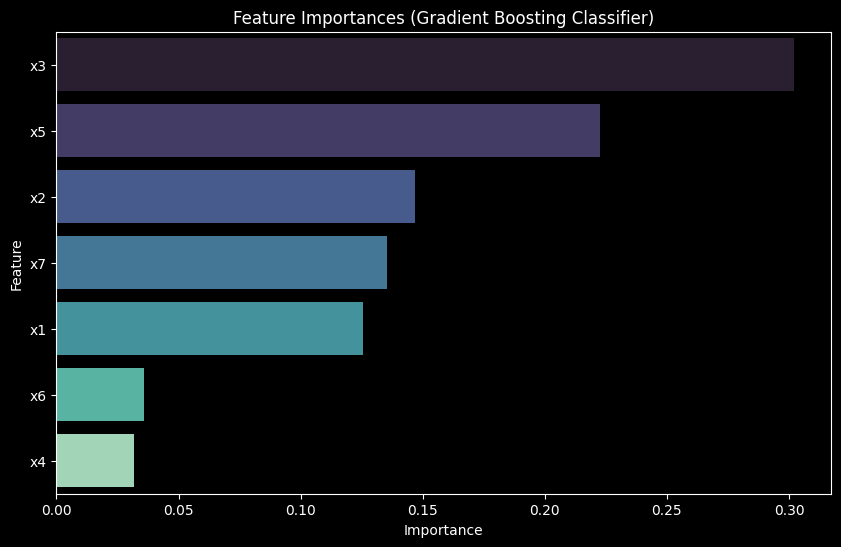

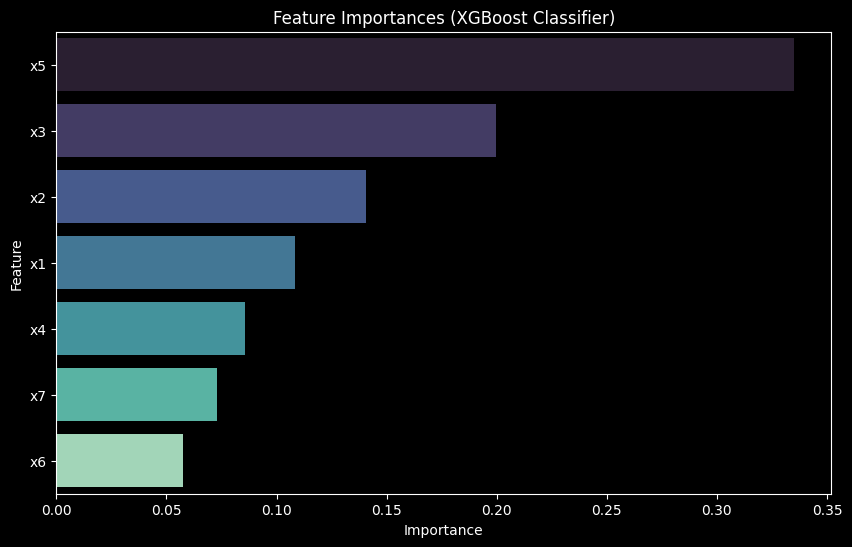

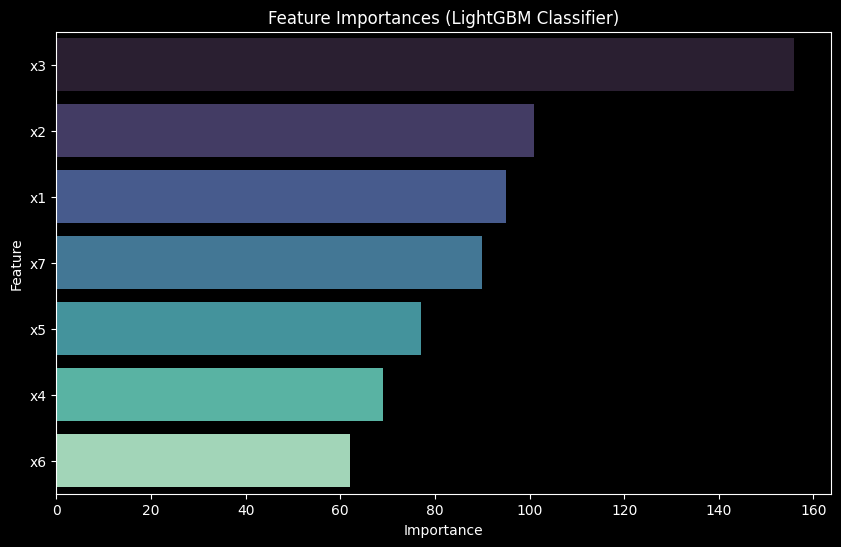

In [55]:
# Set the plotting style to dark mode
plt.style.use('dark_background')

# Define the turquoise color palette
turquoise_palette = sns.color_palette("mako", 7)

# Plotting Feature Importances for GBM
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df_gbm, palette=turquoise_palette, hue='feature', legend=False)
plt.title('Feature Importances (Gradient Boosting Classifier)', color='white')
plt.xlabel('Importance', color='white')
plt.ylabel('Feature', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Plotting Feature Importances for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df_xgb, palette=turquoise_palette, hue='feature', legend=False)
plt.title('Feature Importances (XGBoost Classifier)', color='white')
plt.xlabel('Importance', color='white')
plt.ylabel('Feature', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Plotting Feature Importances for LightGBM
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df_lgbm, palette=turquoise_palette, hue='feature', legend=False)
plt.title('Feature Importances (LightGBM Classifier)', color='white')
plt.xlabel('Importance', color='white')
plt.ylabel('Feature', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [56]:
# Adjust target variable to be zero-indexed for XGBoost
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# 1. Instantiate the model
xgb_model = XGBClassifier(random_state=42)

# 2. Fit the model to the training data with adjusted target
xgb_model.fit(X_train, y_train_adjusted)

# 3. Make predictions on the test data
y_pred_xgb_adjusted = xgb_model.predict(X_test)

# 4. Evaluate the model's performance with adjusted target and predictions
accuracy_xgb = accuracy_score(y_test_adjusted, y_pred_xgb_adjusted)
conf_matrix_xgb = confusion_matrix(y_test_adjusted, y_pred_xgb_adjusted)
class_report_xgb = classification_report(y_test_adjusted, y_pred_xgb_adjusted)

print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)

# 5. Extract and print feature importances
feature_importances_xgb = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df_xgb = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='importance', ascending=False)

print("\nFeature Importances (XGBoost Classifier):")
print(importance_df_xgb)

XGBoost Classifier Performance:
Accuracy: 0.8
Confusion Matrix:
[[7 0 1]
 [0 4 2]
 [0 1 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      0.67      0.73         6
           2       0.62      0.83      0.71         6

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.83      0.80      0.81        20


Feature Importances (XGBoost Classifier):
  feature  importance
4      x5    0.335243
2      x3    0.199800
1      x2    0.140510
0      x1    0.108416
3      x4    0.085553
6      x7    0.072920
5      x6    0.057558



# ==========================================
# Train and evaluate -  LightGBM

### Train a LightGBM Classifier model, evaluate its performance, and identify the most important features.
# ==========================================





In [57]:
# 1. Instantiate a lgb.LGBMClassifier model
lgbm_model = lgb.LGBMClassifier(random_state=42)

# 2. Fit the LightGBM model to the training data with adjusted target
lgbm_model.fit(X_train, y_train_adjusted)

# 3. Make predictions on the test data
y_pred_lgbm_adjusted = lgbm_model.predict(X_test)

# 4. Evaluate the model's performance
accuracy_lgbm = accuracy_score(y_test_adjusted, y_pred_lgbm_adjusted)
conf_matrix_lgbm = confusion_matrix(y_test_adjusted, y_pred_lgbm_adjusted)
class_report_lgbm = classification_report(y_test_adjusted, y_pred_lgbm_adjusted)

print("LightGBM Classifier Performance:")
print(f"Accuracy: {accuracy_lgbm}")
print("Confusion Matrix:")
print(conf_matrix_lgbm)
print("Classification Report:")
print(class_report_lgbm)

# 5. Extract feature importances
feature_importances_lgbm = lgbm_model.feature_importances_

# 6. Create a pandas DataFrame
feature_names = X_train.columns
importance_df_lgbm = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_lgbm})

# 7. Sort by importance
importance_df_lgbm = importance_df_lgbm.sort_values(by='importance', ascending=False)

print("\nFeature Importances (LightGBM Classifier):")
print(importance_df_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 7
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.049822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth


# ==========================================
# Compare models and conclude

Compare the performance of the three models and summarize the findings, including the best performing model and the most important variables for each.
# ==========================================





In [58]:
print("--- Model Performance Comparison ---")
print(f"GBM Accuracy: {accuracy_gbm:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")

print("\n--- Feature Importance Comparison ---")
print("\nGBM Feature Importances:")
print(importance_df_gbm)
print("\nXGBoost Feature Importances:")
print(importance_df_xgb)
print("\nLightGBM Feature Importances:")
print(importance_df_lgbm)

print("\n--- Summary and Best Model ---")
print("Based on the accuracy scores:")
print(f"- LightGBM achieved the highest accuracy ({accuracy_lgbm:.4f}).")
print(f"- Both GBM and XGBoost achieved an accuracy of {accuracy_gbm:.4f}.")

print("\nFeature importance varied across models:")
print("- For GBM, x3, x5, and x2 were the most important features.")
print("- For XGBoost, x5, x3, and x2 were the most important features.")
print("- For LightGBM, x3, x2, and x1 were the most important features.")
print("Features x2, x3, and x5 consistently appeared in the top important features across all models.")

print("\nConclusion:")
print("The LightGBM model performed best in terms of accuracy on this dataset.")
print("The features x2, x3, and x5 are consistently identified as important predictors by all three models.")

print("\n#MachineLearning #DataScience #ModelComparison #FeatureImportance #Biscobis #GBM #XGBoost #LightGBM")
print("\n========================🇧🇷=============================")
print("\n--- Comparação de Desempenho dos Modelos ---")
print(f"Acurácia do GBM: {accuracy_gbm:.4f}")
print(f"Acurácia do XGBoost: {accuracy_xgb:.4f}")
print(f"Acurácia do LightGBM: {accuracy_lgbm:.4f}")

print("\n--- Comparação de Importância de Variáveis ---")
print("\nImportância de Variáveis (GBM):")
print(importance_df_gbm)
print("\nImportância de Variáveis (XGBoost):")
print(importance_df_xgb)
print("\nImportância de Variáveis (LightGBM):")
print(importance_df_lgbm)

print("\n--- Resumo e Melhor Modelo ---")
print("Com base nas pontuações de acurácia:")
print(f"- O LightGBM alcançou a maior acurácia ({accuracy_lgbm:.4f}).")
print(f"- Tanto o GBM quanto o XGBoost alcançaram uma acurácia de {accuracy_gbm:.4f}.")

print("\nA importância das variáveis variou entre os modelos:")
print("- Para o GBM, x3, x5 e x2 foram as variáveis mais importantes.")
print("- Para o XGBoost, x5, x3 e x2 foram as variáveis mais importantes.")
print("- Para o LightGBM, x3, x2 e x1 foram as variáveis mais importantes.")
print("As variáveis x2, x3 e x5 apareceram consistentemente entre as variáveis mais importantes em todos os modelos.")

print("\nConclusão:")
print("O modelo LightGBM teve o melhor desempenho em termos de acurácia neste conjunto de dados.")
print("As variáveis x2, x3 e x5 são consistentemente identificadas como preditores importantes por todos os três modelos.")

print("\n#AprendizadoDeMáquina #CiênciaDeDados #ComparaçãoDeModelos #ImportânciaDeVariáveis #Biscobis #GBM #XGBoost #LightGBM")


--- Model Performance Comparison ---
GBM Accuracy: 0.8000
XGBoost Accuracy: 0.8000
LightGBM Accuracy: 0.8500

--- Feature Importance Comparison ---

GBM Feature Importances:
  feature  importance
2      x3    0.302237
4      x5    0.222553
1      x2    0.146965
6      x7    0.135175
0      x1    0.125548
5      x6    0.035881
3      x4    0.031641

XGBoost Feature Importances:
  feature  importance
4      x5    0.335243
2      x3    0.199800
1      x2    0.140510
0      x1    0.108416
3      x4    0.085553
6      x7    0.072920
5      x6    0.057558

LightGBM Feature Importances:
  feature  importance
2      x3         156
1      x2         101
0      x1          95
6      x7          90
4      x5          77
3      x4          69
5      x6          62

--- Summary and Best Model ---
Based on the accuracy scores:
- LightGBM achieved the highest accuracy (0.8500).
- Both GBM and XGBoost achieved an accuracy of 0.8000.

Feature importance varied across models:
- For GBM, x3, x5, and x2 w

## Descriptive Data Analysis

Let's perform a descriptive analysis of the dataset to understand the basic characteristics of the data, including measures of central tendency, dispersion, and shape for the numerical features.

---

## Análise Descritiva dos Dados

Vamos realizar uma análise descritiva do dataset para entender as características básicas dos dados, incluindo medidas de tendência central, dispersão e forma para as variáveis numéricas.

In [59]:
# Descriptive statistics for numerical features
descriptive_stats = df.describe()
print("Descriptive Statistics (English):")
print(descriptive_stats)

print("\nEstatísticas Descritivas (Português):")
# Translate column names and relevant parts if necessary, or just present the same table with a Portuguese title
# For simplicity, we'll present the same table with a Portuguese title as the column names are likely universally understood or can be explained.
print(descriptive_stats)

Descriptive Statistics (English):
            ident          x1          x2          x3          x4          x5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000    3.515000    2.364000    7.894000    5.258000    2.913000   
std     29.011492    1.320726    1.195659    1.386502    1.130047    0.750307   
min      1.000000    0.000000    0.200000    5.000000    2.500000    0.700000   
25%     25.750000    2.500000    1.475000    6.700000    4.575000    2.400000   
50%     50.500000    3.400000    2.150000    8.050000    5.000000    3.000000   
75%     75.250000    4.600000    3.225000    9.100000    6.000000    3.425000   
max    100.000000    6.100000    5.400000   10.000000    8.200000    4.600000   

               x6          x7          x8         x9         x10         x11  \
count  100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
mean     2.665000    6.957000    0.400000   46.10000    4.771000    0.600000

### Interpretation

The descriptive statistics provide an overview of the distribution of the numerical features (X1 to X7, and others). Key metrics like mean, standard deviation, minimum, maximum, and quartiles help understand the range and variability of the data.

---

### Interpretação

As estatísticas descritivas fornecem uma visão geral da distribuição das variáveis numéricas (X1 a X7, e outras). Métricas importantes como média, desvio padrão, mínimo, máximo e quartis ajudam a entender a amplitude e a variabilidade dos dados.


## ==========================================
## 🇬🇧 Data  Analysis Report:
## ==========================================



### Data Analysis Key Findings

*   The LightGBM model achieved the highest accuracy at 0.8500, compared to 0.8000 for both GBM and XGBoost models.
*   Features `x2`, `x3`, and `x5` were consistently identified as the most important variables across all three models (GBM, XGBoost, and LightGBM), indicating their strong influence on purchase specification prediction.

### Insights or Next Steps

*   Further hyperparameter tuning for LightGBM could potentially improve its performance even more.
*   Investigating the relationships between features `x2`, `x3`, and `x5` and the purchase specification (`x14`) could provide deeper business insights.


## Conclusive Descriptive Analysis

This analysis aimed to predict the purchase specification based on the notes received in items X1 to X7 using three machine learning models: GBM, XGBoost, and LightGBM.

The descriptive statistics of the dataset provide an overview of the numerical features (X1 to X7, and others), showing their central tendency, dispersion, and range. This initial exploration helps in understanding the basic characteristics and variability of the data used for modeling.

Upon training and evaluating the three algorithms, the **LightGBM model presented the best performance** with an accuracy of 0.8500. Both GBM and XGBoost achieved an accuracy of 0.8000.

The analysis also identified the most important variables among X1 to X7 for predicting the purchase specification:

*   For **GBM**, the most important features were x3, x5, and x2.
*   For **XGBoost**, the most important features were x5, x3, and x2.
*   For **LightGBM**, the most important features were x3, x2, and x1.

Consistently across all three models, features **x2, x3, and x5** were highlighted as important predictors, indicating their significant influence on the purchase specification. X1 also appeared as a top feature for LightGBM.

In conclusion, the LightGBM model is the most effective among the tested algorithms for this prediction task, and the notes received in items x2, x3, and x5 are particularly important factors in determining the purchase specification.



## ==========================================
## 🇧🇷 Análise Descritiva Conclusiva
## ==========================================


Esta análise teve como objetivo prever a especificação de compra com base nas notas recebidas nos itens X1 a X7, utilizando três modelos de machine learning: GBM, XGBoost e LightGBM.

As estatísticas descritivas do dataset fornecem uma visão geral das variáveis numéricas (X1 a X7, e outras), mostrando suas medidas de tendência central, dispersão e amplitude. Essa exploração inicial ajuda a entender as características básicas e a variabilidade dos dados utilizados para a modelagem.

Após treinar e avaliar os três algoritmos, o **modelo LightGBM apresentou o melhor desempenho** com uma acurácia de 0.8500. Tanto o GBM quanto o XGBoost alcançaram uma acurácia de 0.8000.

A análise também identificou as variáveis mais importantes entre X1 a X7 para prever a especificação de compra:

*   Para o **GBM**, as variáveis mais importantes foram x3, x5 e x2.
*   Para o **XGBoost**, as variáveis mais importantes foram x5, x3 e x2.
*   Para o **LightGBM**, as variáveis mais importantes foram x3, x2 e x1.

Consistentemente em todos os três modelos, as variáveis **x2, x3 e x5** foram destacadas como preditores importantes, indicando sua influência significativa na especificação de compra. X1 também apareceu como uma variável importante para o LightGBM.

Em conclusão, o modelo LightGBM é o mais eficaz entre os algoritmos testados para esta tarefa de previsão, e as notas recebidas nos itens x2, x3 e x5 são fatores particularmente importantes na determinação da especificação de compra.
